# Student Questionnaire

In [1]:
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
for i in tqdm(["a", "b"]):
    pass

100%|██████████| 2/2 [00:00<00:00, 42153.81it/s]


In [2]:
# Student questionnaire data file (takes over 2 minutes to load)
df_student = pd.read_spss("../raw_data/unzipped/CY08MSP_STU_QQQ.SAV")

In [3]:
display(df_student)

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
0,Albania,Albania,800282.0,800001.0,08MS,Albania,ALB - stratum 03: Urban / Center / Public,Albania,Albania,No,...,226.250,203.029,219.817,331.017,223.752,305.671,230.156,289.436,0.55561,03MAY23:10:11:25
1,Albania,Albania,800115.0,800002.0,08MS,Albania,ALB - stratum 03: Urban / Center / Public,Albania,Albania,No,...,298.644,321.405,320.452,284.836,364.565,304.044,347.626,352.269,0.76431,03MAY23:10:11:25
2,Albania,Albania,800242.0,800003.0,08MS,Albania,ALB - stratum 01: Urban / North / Public,Albania,Albania,No,...,383.340,376.019,285.901,289.896,338.469,316.296,324.361,343.351,1.37877,03MAY23:10:11:25
3,Albania,Albania,800245.0,800005.0,08MS,Albania,ALB - stratum 08: Rural / Center / Public,Albania,Albania,No,...,264.532,303.422,327.793,165.575,246.156,238.322,275.860,227.466,1.49361,03MAY23:10:11:26
4,Albania,Albania,800285.0,800006.0,08MS,Albania,ALB - stratum 03: Urban / Center / Public,Albania,Albania,No,...,399.300,514.739,539.850,461.793,514.465,510.462,490.537,503.793,0.65249,03MAY23:10:11:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613739,Uzbekistan,Uzbekistan,86000120.0,86007488.0,08MS,Uzbekistan,UZB - stratum 26: Khorezm/Rural,Uzbekistan,Uzbekistan,No,...,334.153,306.551,271.135,386.969,376.271,368.287,395.329,278.263,0.71987,02MAY23:13:18:15
613740,Uzbekistan,Uzbekistan,86000140.0,86007489.0,08MS,Uzbekistan,UZB - stratum 04: Andijan/Rural,Uzbekistan,Uzbekistan,No,...,272.456,335.952,232.583,179.328,233.470,203.001,254.340,233.187,0.65541,02MAY23:13:18:13
613741,Uzbekistan,Uzbekistan,86000024.0,86007490.0,08MS,Uzbekistan,UZB - stratum 10: Kashkadarya/Rural,Uzbekistan,Uzbekistan,No,...,395.368,451.614,432.586,387.329,456.236,424.790,408.986,460.542,0.67910,02MAY23:13:18:13
613742,Uzbekistan,Uzbekistan,86000174.0,86007491.0,08MS,Uzbekistan,UZB - stratum 16: Samarkand/Rural,Uzbekistan,Uzbekistan,No,...,339.529,272.346,317.838,248.165,405.860,364.173,346.663,341.668,0.68618,02MAY23:13:18:14


In [4]:
nan_values_count = df_student.isnull().sum().sum()
print(nan_values_count)

358232894


In [5]:
print(list(df_student.columns))

['CNT', 'CNTRYID', 'CNTSCHID', 'CNTSTUID', 'CYC', 'NatCen', 'STRATUM', 'SUBNATIO', 'REGION', 'OECD', 'ADMINMODE', 'LANGTEST_QQQ', 'LANGTEST_COG', 'LANGTEST_PAQ', 'Option_CT', 'Option_FL', 'Option_ICTQ', 'Option_WBQ', 'Option_PQ', 'Option_TQ', 'Option_UH', 'BOOKID', 'ST001D01T', 'ST003D02T', 'ST003D03T', 'ST004D01T', 'ST250Q01JA', 'ST250Q02JA', 'ST250Q03JA', 'ST250Q04JA', 'ST250Q05JA', 'ST250D06JA', 'ST250D07JA', 'ST251Q01JA', 'ST251Q02JA', 'ST251Q03JA', 'ST251Q04JA', 'ST251Q06JA', 'ST251Q07JA', 'ST251D08JA', 'ST251D09JA', 'ST253Q01JA', 'ST254Q01JA', 'ST254Q02JA', 'ST254Q03JA', 'ST254Q04JA', 'ST254Q05JA', 'ST254Q06JA', 'ST255Q01JA', 'ST256Q01JA', 'ST256Q02JA', 'ST256Q03JA', 'ST256Q06JA', 'ST256Q07JA', 'ST256Q08JA', 'ST256Q09JA', 'ST256Q10JA', 'ST230Q01JA', 'ST005Q01JA', 'ST006Q01JA', 'ST006Q02JA', 'ST006Q03JA', 'ST006Q04JA', 'ST006Q05JA', 'ST007Q01JA', 'ST008Q01JA', 'ST008Q02JA', 'ST008Q03JA', 'ST008Q04JA', 'ST008Q05JA', 'ST258Q01JA', 'ST259Q01JA', 'ST259Q02JA', 'ST019AQ01T', 'ST019BQ01

In [6]:
df_student.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613744 entries, 0 to 613743
Data columns (total 1278 columns):
 #     Column        Non-Null Count   Dtype   
---    ------        --------------   -----   
 0     CNT           613744 non-null  category
 1     CNTRYID       613744 non-null  category
 2     CNTSCHID      613744 non-null  float64 
 3     CNTSTUID      613744 non-null  float64 
 4     CYC           613744 non-null  object  
 5     NatCen        613744 non-null  category
 6     STRATUM       613744 non-null  category
 7     SUBNATIO      613744 non-null  category
 8     REGION        613744 non-null  category
 9     OECD          613744 non-null  category
 10    ADMINMODE     613744 non-null  category
 11    LANGTEST_QQQ  602876 non-null  category
 12    LANGTEST_COG  613744 non-null  category
 13    LANGTEST_PAQ  93015 non-null   category
 14    Option_CT     613744 non-null  category
 15    Option_FL     613744 non-null  category
 16    Option_ICTQ   613744 non-null  cat

In [7]:
df_student.describe(include=['category'])

,CNT,CNTRYID,NatCen,STRATUM,SUBNATIO,REGION,OECD,ADMINMODE,LANGTEST_QQQ,LANGTEST_COG,...,PARINVOL,PQSCHOOL,PASCHPOL,ATTIMMP,PAREXPT,CREATHME,CREATACT,CREATOPN,CREATOR,UNIT
count,613744,613744,613744,613744,613744,613744,613744,613744,602876,613744,...,90070.0000,90276.0000,89808.0000,79904.0000,91533,89879.0000,69982.0000,89488.0000,89738.0000,613744
unique,80,80,84,1014,88,138,2,2,55,58,...,7990.0000,6081.0000,5178.0000,1112.0000,9,14774.0000,11550.0000,15422.0000,9733.0000,3
top,Spain,Spain,Spain,Undisclosed STRATUM - Canada,Spain,United Arab Emirates,No,Computer,Spanish,Spanish,...,-0.8126,-0.2402,0.1937,-0.4189,ISCED Level 8,-0.1759,-0.9143,0.2141,0.1257,final variance unit 2
freq,30800,30800,30800,23073,30800,24600,318587,592123,104480,106569,...,6929.0000,17140.0000,8656.0000,13114.0000,34745,4476.0000,23538.0000,2882.0000,6310.0000,301317


In [8]:
df_student.describe(include=["float64"])

,CNTSCHID,CNTSTUID,W_FSTUWT,W_FSTURWT1,W_FSTURWT2,W_FSTURWT3,W_FSTURWT4,W_FSTURWT5,W_FSTURWT6,W_FSTURWT7,...,PV2MPRE,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT
count,6.137440e+05,6.137440e+05,613744.000000,613744.000000,613744.000000,613744.000000,613744.000000,613744.000000,613744.000000,613744.000000,...,592123.000000,592123.000000,592123.000000,592123.000000,592123.000000,592123.000000,592123.000000,592123.000000,592123.000000,613744.000000
mean,4.348123e+07,4.342643e+07,46.037446,45.849420,46.045802,46.060659,46.365620,46.042791,45.980096,46.132477,...,442.271452,442.058179,442.014647,441.830879,442.035637,441.936271,442.161419,442.089600,442.073530,0.651738
std,2.558506e+07,2.548515e+07,106.256911,119.228886,121.552813,119.877994,122.399428,121.140295,121.345185,119.837564,...,107.162477,107.411664,107.309852,107.613213,107.274656,107.179482,107.017426,107.333904,107.076819,0.405159
min,8.000010e+05,8.000010e+05,1.000000,0.500000,0.292890,0.292890,0.292890,0.292890,0.292890,0.292890,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.524000,0.000000,0.004990
25%,2.140006e+07,2.140198e+07,5.013522,3.972030,3.951450,3.960500,3.940670,3.984790,3.960915,3.958170,...,363.976000,363.671500,363.810500,363.211000,363.566500,363.694000,364.194500,363.738000,364.147500,0.368080
50%,3.980055e+07,3.981988e+07,12.389480,11.036700,11.095940,11.156590,11.090910,11.039200,11.088460,11.069140,...,437.279000,437.424000,436.909000,436.795000,437.057000,436.830000,437.336000,437.054000,437.074000,0.682440
75%,6.880013e+07,6.880501e+07,41.616520,34.232980,34.232980,33.929930,34.232980,34.249060,34.187360,34.389587,...,516.985000,517.176500,516.823500,517.002500,516.858500,516.374000,516.996000,516.967500,516.440000,0.826460
max,9.010018e+07,8.600749e+07,2371.650000,4107.640000,4412.156000,3520.890000,3650.233000,4255.961000,3546.280000,3566.918000,...,920.868000,940.027000,918.080000,906.043000,939.225000,904.258000,893.024000,943.962000,945.504000,11.643580


In [9]:
df_student.describe(include=['object'])

,CYC,VER_DAT
count,613744,613744
unique,1,281
top,08MS,02MAY23:14:43:19
freq,613744,6068


## Data Processing - Handle Columns Labeled as Category But Are Really Numbers

In [10]:
def all_are_int(values):
    for v in values:
        if v is np.nan:
            continue
        if type(v) == str and re.fullmatch(r"^-?\d+$", v) is None:
            return False
    return True


def all_are_float(values):
    for v in values:
        if v is np.nan:
            continue
        if type(v) == str and re.fullmatch(r"^-?\d*\.\d*$", v) is None:
            return False
    return True


def all_are_unary(values):
    length = len(values)
    if np.nan in values:
        length -= 1

    if length == 1:
        return True
    
    return False


def all_are_binary(values):
    length = len(values)
    
    if np.nan in values:
        length -= 1

    if length == 2:
        return True
    
    return False


def get_type_of_list(values):
    t_ = None
    for v in values:
        if v is np.nan:
            continue
        if t_ is None:
            t_ = type(v)
        assert type(v) == t_
    return t_


def convert_to_float(val):
    return float(val)


def convert_to_int(val):
    return float(val)

In [11]:
columns = df_student.select_dtypes('category').columns

for col in tqdm(columns):
    unique = list(df_student[col].unique())
    t_ = get_type_of_list(unique)
    nan_count = df_student[col].isnull().sum()

    if t_ == int:
        df_student[col] = df_student[col].astype("Int64")

    elif t_ == float:
        df_student[col] = df_student[col].astype(float)

    else:
        is_int = all_are_int(unique)
        is_float = all_are_float(unique)

        if (is_int or is_float):
            if is_int == is_float:
                raise Exception(f"col: {col} | int: {is_int} | float: {is_float} | {unique[:5]} | {[type(u) for u in unique[:5]]}")
            
            if is_int:
                df_student[col] = df_student[col].astype("Int64")
           
            if is_float:
                df_student[col] = df_student[col].astype(float)
    
    new_nan_count = df_student[col].isnull().sum()
    assert nan_count == new_nan_count, f"{col}: {nan_count} != {new_nan_count}"

100%|██████████| 1081/1081 [01:06<00:00, 16.36it/s]


In [12]:
df_student.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613744 entries, 0 to 613743
Data columns (total 1278 columns):
 #     Column        Non-Null Count   Dtype   
---    ------        --------------   -----   
 0     CNT           613744 non-null  category
 1     CNTRYID       613744 non-null  category
 2     CNTSCHID      613744 non-null  float64 
 3     CNTSTUID      613744 non-null  float64 
 4     CYC           613744 non-null  object  
 5     NatCen        613744 non-null  category
 6     STRATUM       613744 non-null  category
 7     SUBNATIO      613744 non-null  category
 8     REGION        613744 non-null  category
 9     OECD          613744 non-null  category
 10    ADMINMODE     613744 non-null  category
 11    LANGTEST_QQQ  602876 non-null  category
 12    LANGTEST_COG  613744 non-null  category
 13    LANGTEST_PAQ  93015 non-null   category
 14    Option_CT     613744 non-null  category
 15    Option_FL     613744 non-null  category
 16    Option_ICTQ   613744 non-null  cat

In [13]:
!python --version

Python 3.11.5


## Data Processing - Handle Columns Labeled as Category --> Make Numerical Encoding

In [14]:
def get_correct_cat_order_len_2(options):
    assert len(options) == 2, options

    value = '|'.join(sorted([x for x in options if x is not np.nan]))

    if value == 'At lease one class skipped in the prior two weeks|No classes skipped in the prior two weeks':
        return ["At lease one class skipped in the prior two weeks", "No classes skipped in the prior two weeks"]
    elif value == 'Checked|Not Checked':
        return ["Checked", "Not Checked"]
    elif value == 'Computer|Paper':
        return ["Computer", "Paper"]
    elif value == 'Female|Male':
        return ["Male", "Female"]
    elif value == 'Language of the test|Other language':
        return ["Language of the test", "Other language"]
    elif value == 'Missed school for >3 months at least once|Never missed school for >3 months':
        return ["Missed school for >3 months at least once", "Never missed school for >3 months"]
    elif value == 'More motivated to do well in mathematics than other subjects|Not more motivated to do well in mathematics than other subjects':
        return ["More motivated to do well in mathematics than other subjects", "Not more motivated to do well in mathematics than other subjects"]
    elif value == 'Never repeated|Repeated at lease once':
        return ["Repeated at lease once", "Never repeated"]
    elif value == 'No perception of mathematics as easier than other subjects|Perception of mathematics as easier than other subjects':
        return ["Perception of mathematics as easier than other subjects", "No perception of mathematics as easier than other subjects"]
    elif value == 'No preference for mathematics over other subjects|Preference for mathematics over other subjects':
        return ["Preference for mathematics over other subjects", "No preference for mathematics over other subjects"]
    elif value == 'No|Yes':
        return ["Yes", "No"]
    elif value == 'clear idea of future job|no clear idea of future job':
        return ["clear idea of future job", "no clear idea of future job"]
    else:
        raise Exception(value)


In [15]:
def get_correct_cat_order_len_3(options):
    assert len(options) == 3, options
    
    value = '|'.join(sorted([x for x in options if x is not np.nan]))

    if value == 'Almost always|Almost never|Sometimes':
        return ["Almost always", "Sometimes", "Almost never"]
    elif value == "Country of test|I don't know.|Other country":
        return ["Country of test", "Other country", "I don't know."]
    elif value == 'Every day|Rarely or never|Several times a day':
        return ["Several times a day", "Every day", "Rarely or never"]
    elif value == 'First-Generation student|Native student|Second-Generation student':
        return ["Native student", "First-Generation student", "Second-Generation student"]
    elif value == 'Frequently late (late 3 or more times in the prior two weeks)|Occasionally late (late 1 to 2 times in the prior two weeks)|On-time (not late in the prior two weeks)':
        return ["On-time (not late in the prior two weeks)", "Occasionally late (late 1 to 2 times in the prior two weeks)", "Frequently late (late 3 or more times in the prior two weeks)"]
    elif value == "Heard of it, but I don't recall the meaning|Learnt about it, and I know what it means|Never heard of it":
        return ["Learnt about it, and I know what it means", "Heard of it, but I don't recall the meaning", "Never heard of it"]
    elif value == 'I am not sure|No|Yes':
        return ["Yes", "No", "I am not sure"]
    elif value == "I don't know what it is|No|Yes":
        return ["Yes", "No", "I don't know what it is"]
    elif value == "I don't know.|No|Yes":
        return ["Yes", "No", "I don't know."]
    elif value == 'I learnt about as much when my school building was closed.|I learnt less when my school building was closed.|I learnt more when my school building was closed.':
        return ["I learnt more when my school building was closed.", "I learnt about as much when my school building was closed.", "I learnt less when my school building was closed."]
    elif value == 'Never|Often|Sometimes':
        return ["Never", "Often", "Sometimes"]
    elif value == 'No, never|Yes, once|Yes, twice or more':
        return ["Yes, twice or more", "Yes, once", "No, never"]
    elif value == 'No|Not supported by school|Yes':
        return ["Yes", "No", "Not supported by school"]
    elif value == 'No|Yes, once|Yes, two or more times':
        return ["Yes, two or more times", "Yes, once", "No"]
    elif value == 'There are no other schools in this area that compete with the school my child is currently attending.|There are two or more other schools in this area that compete with the school my child is currently attending.|There is one other school in this area that competes with the school my child is currently attending.':
        return ["There are two or more other schools in this area that compete with the school my child is currently attending.", "There is one other school in this area that competes with the school my child is currently attending.", "There are no other schools in this area that compete with the school my child is currently attending."]
    elif value == 'final variance unit 1|final variance unit 2|final variance unit 3':
        return ["final variance unit 1", "final variance unit 2", "final variance unit 3"]
    else:
        raise Exception(value)


In [16]:
def get_correct_cat_order_len_4(options):
    assert len(options) == 4, options
    
    value = '|'.join(sorted([x for x in options if x is not np.nan]))

    if value == 'A few times a month|A few times a year|Never or almost never|Once a week or more':
        return ["Once a week or more", "A few times a month", "A few times a year", "Never or almost never"]
    elif value == 'A few times|About once or twice a week|Every day or almost every day|Never':
        return ["Every day or almost every day", "About once or twice a week", "A few times", "Never"]
    elif value == 'A little|Extremely|Not at all|Quite a bit':
        return ["Extremely", "Quite a bit", "A little", "Not at all"]
    elif value == 'Agree|Disagree|Strongly Disagree|Strongly agree':
        return ["Strongly agree", "Agree", "Disagree", "Strongly Disagree"]
    elif value == 'Agree|Disagree|Strongly agree|Strongly disagree':
        return ["Strongly agree", "Agree", "Disagree", "Strongly disagree"]
    elif value == 'Almost every day|Never or hardly ever|Once or twice a month|Once or twice a week':
        return ["Almost every day", "Once or twice a week", "Once or twice a month", "Never or hardly ever"]
    elif value == 'Always|Never|Often|Sometimes':
        return ["Always", "Often", "Sometimes", "Never"]
    elif value == 'Always|Never|Rarely|Sometimes':
        return ["Always", "Sometimes", "Rarely", "Never"]
    elif value == 'Attendance was mandatory.|Most other children attended an <early childhood education and care arrangement>.|We/I could not care for the child (e.g. work, illness).|We/I wanted additional learning stimulation for the child (e.g. social, academic).':
        return ["We/I wanted additional learning stimulation for the child (e.g. social, academic).", "Most other children attended an <early childhood education and care arrangement>.", "Attendance was mandatory.", "We/I could not care for the child (e.g. work, illness)."]
    elif value == 'Confident|Not at all confident|Not very confident|Very confident':
        return ["Very confident", "Confident", "Not very confident", "Not at all confident"]
    elif value == 'Every lesson|Most lessons|Never or almost never|Some lessons':
        return ["Every lesson", "Most lessons", "Some lessons", "Never or almost never"]
    elif value == 'Excellent|Fair|Good|Poor':
        return ["Excellent", "Good", "Fair", "Poor"]
    elif value == 'Five or more times|Never|One or two times|Three or four times':
        return ["Five or more times", "Three or four times", "One or two times", "Never"]
    elif value == 'Four or more|One|Three|Two':
        return ["Four or more", "Three", "Two", "One"]
    elif value == 'Frequently|Never|Rarely|Sometimes':
        return ["Frequently", "Sometimes", "Rarely", "Never"]
    elif value == "I don't have this class.|I don't know.|No|Yes":
        return ["Yes", "No", "I don't have this class.", "I don't know."]
    elif value == 'I never attended such a class|More than seven days ago|More than two days ago|Today or yesterday':
        return ["Today or yesterday", "More than two days ago", "More than seven days ago", "I never attended such a class"]
    elif value == 'Important|Not important|Somewhat important|Very important':
        return ["Very important", "Important", "Somewhat important", "Not important"]
    elif value == "My parents don't know my friends|No|Yes, all of them|Yes, but only some of them":
        return ["Yes, all of them", "Yes, but only some of them", "My parents don't know my friends", "No"]
    elif value == 'None|One|Three or more|Two':
        return ["Three or more", "Two", "One", "None"]
    elif value == 'Not at all satisfied|Not satisfied|Satisfied|Totally satisfied':
        return ["Totally satisfied", "Satisfied", "Not satisfied", "Not at all satisfied"]
    elif value == 'Not prepared at all|Not very prepared|Very well prepared|Well prepared':
        return ["Very well prepared", "Well prepared", "Not very prepared", "Not prepared at all"]
    else:
        raise Exception(value)


In [17]:
def get_correct_cat_order_len_5(options):
    assert len(options) == 5, options
    
    value = '|'.join(sorted([x for x in options if x is not np.nan]))

    if value == "1 or 2|3 - 5|I don't know.|More than 5|None":
        return ["More than 5", "3 - 5", "1 or 2", "None", "I don't know."]
    elif value == "1-5|6-10|I don't know|More than 10|None":
        return ["More than 10", "6-10", "1-5", "None", "I don't know"]
    elif value == '2 to 3 times a week|4 to 5 times a week|About once a week|Every day or almost every day|Never or almost never':
        return ["Every day or almost every day","4 to 5 times a week", "2 to 3 times a week", "About once a week", "Never or almost never"]
    elif value == '<ISCED level 1>|<ISCED level 2>|<ISCED level 3.3>|<ISCED level 3.4>|He did not complete <ISCED level 1>.':
        return ["<ISCED level 1>", "<ISCED level 2>", "<ISCED level 3.3>", "<ISCED level 3.4>", "He did not complete <ISCED level 1>."]
    elif value == '<ISCED level 1>|<ISCED level 2>|<ISCED level 3.3>|<ISCED level 3.4>|She did not complete <ISCED level 1>.':
        return ["<ISCED level 1>", "<ISCED level 2>", "<ISCED level 3.3>", "<ISCED level 3.4>", "She did not complete <ISCED level 1>."]
    elif value == 'A digital device that my school gave or lent to me|A digital device that was also used by other family members|I did not have any digital device for my schoolwork.|My own laptop, desktop computer, or tablet|My own smartphone':
        return ["My own laptop, desktop computer, or tablet", "My own smartphone", "A digital device that my school gave or lent to me", "A digital device that was also used by other family members", "I did not have any digital device for my schoolwork."]
    elif value == 'A little upset|Not at all upset|Quite upset|This did not happen to me|Very upset':
        return ["Very upset", "Quite upset", "A little upset", "Not at all upset", "This did not happen to me"]
    elif value == 'About every day|About every month|About every week|More than once a week|Rarely or never':
        return ["About every day", "More than once a week", "About every week", "About every month", "Rarely or never"]
    elif value == 'About half of the lessons|Every lesson or almost every lesson|Less than half of the lessons|More than half of the lessons|Never or almost never':
        return ["Every lesson or almost every lesson", "More than half of the lessons", "About half of the lessons", "Less than half of the lessons", "Never or almost never"]
    elif value == 'About half of the time|All or almost all of the time|Less than half of the time|More than half of the time|Never or almost never':
        return ["All or almost all of the time", "More than half of the time", "About half of the time",  "Less than half of the time", "Never or almost never"]
    elif value == 'About once or twice a month|About once or twice a week|About once or twice a year|Every day or almost every day|Never or almost never':
        return ["Every day or almost every day", "About once or twice a week", "About once or twice a month", "About once or twice a year", "Never or almost never"]
    elif value == "Agree|Disagree|I don't have an opinion|Strongly agree|Strongly disagree":
        return ["Strongly agree", "Agree", "I don't have an opinion", "Disagree", "Strongly disagree"]
    elif value == 'Agree|Disagree|Neither agree nor disagree|Strongly agree|Strongly disagree':
        return ["Strongly agree", "Agree", "Neither agree nor disagree", "Disagree", "Strongly disagree"]
    elif value == "Difficult|Easy|I don't have or see this person|Very difficult|Very easy":
        return ["Very easy", "Easy", "Difficult", "Very difficult", "I don't have or see this person"]
    elif value == 'Every day or almost every day|Never or hardly ever|Once or twice a month|Once or twice a week|Once or twice a year':
        return ["Every day or almost every day", "Once or twice a week", "Once or twice a month", "Once or twice a year", "Never or hardly ever"]
    elif value == 'Heard of it a few times|Heard of it often|Heard of it once or twice|Know it well, understand the concept|Never heard of it':
        return ["Know it well, understand the concept", "Heard of it often", "Heard of it a few times", "Heard of it once or twice", "Never heard of it"]
    elif value == 'I came to this school after the start of this school year.|I came to this school at the start of this school year.|One school year, not including this school year|Three or more school years, not including this school year|Two school years, not including this school year':
        return ["I came to this school after the start of this school year.", "I came to this school at the start of this school year.", "One school year, not including this school year", "Two school years, not including this school year", "Three or more school years, not including this school year"]
    elif value == "I can do with a bit of effort|I can easily do this|I cannot do this|I don't know what this is|I struggle to do this on my own":
        return ["I can easily do this", "I can do with a bit of effort", "I struggle to do this on my own", "I cannot do this", "I don't know what this is"]
    elif value == 'I never do homework or study for school|More than seven days ago|More than two days ago|Today|Yesterday':
        return ["Today", "Yesterday", "More than two days ago", "More than seven days ago", "I never do homework or study for school"]
    elif value == 'I never spend time outside my home with my friends.|More than seven days ago|More than two days ago|Today|Yesterday':
        return ["Today", "Yesterday", "More than two days ago", "More than seven days ago", "I never spend time outside my home with my friends."]
    else:
        raise Exception(value)


In [18]:
def get_correct_cat_order_len_6(options):
    assert len(options) == 6, options
    
    value = '|'.join(sorted([x for x in options if x is not np.nan]))

    if value == '0 days|1 day|2 days|3 days|4 days|5 or more days':
        return ["0 days", "1 day", "2 days", "3 days", "4 days", "5 or more days"]
    elif value == '<$A> or more but less than <$B>|<$B> or more but less than <$C>|<$C> or more but less than <$D>|<$D> or more but less than <$E>|<$E> or more|Less than <$A>':
        return ["Less than <$A>", "<$A> or more but less than <$B>", "<$B> or more but less than <$C>", "<$C> or more but less than <$D>", "<$D> or more but less than <$E>", "<$E> or more"]
    elif value == '<$W or more but less than $X>|<$X or more but less than $Y>|<$Y or more but less than $Z>|<$Z> or more|<More than $0 but less than $W>|Nothing':
        return ["<$Z> or more", "<$Y or more but less than $Z>", "<$X or more but less than $Y>", "<$W or more but less than $X>", "<More than $0 but less than $W>", "Nothing"]
    elif value == 'About half of the time|All or almost all of the time|Less than half of the time|More than half of the time|Never or almost never|Not applicable':
        return ["All or almost all of the time", "More than half of the time", "About half of the time", "Less than half of the time", "Never or almost never", "Not applicable"]
    elif value == 'About once or twice a month|About once or twice a week|About once or twice a year|Does not apply|Every day or almost every day|Never or almost never':
        return ["Every day or almost every day", "About once or twice a week", "About once or twice a month", "About once or twice a year", "Never or almost never", "Does not apply"]
    elif value == 'About once or twice a month|About once or twice a week|About once or twice a year|Every day or almost every day|Never or almost never|Not available':
        return ["Every day or almost every day", "About once or twice a week", "About once or twice a month", "About once or twice a year", "Never or almost never", "Not available"]
    elif value == 'About once or twice a month|About once or twice a week|About once or twice a year|Every day or almost every day|Never or almost never|Not available at school':
        return ["Every day or almost every day", "About once or twice a week", "About once or twice a month", "About once or twice a year", "Never or almost never", "Not available at school"]
    elif value == 'About once or twice a month|About once or twice a week|Every day or almost every day|Never or almost never|Several times a day|This resource is not available to me at school':
        return ["Several times a day", "Every day or almost every day", "About once or twice a week", "About once or twice a month", "Never or almost never", "This resource is not available to me at school"]
    elif value == 'About once or twice a month|About once or twice a week|Every day or almost every day|Never or almost never|Several times a day|This resource is not available to me outside of school':
        return ["Several times a day", "Every day or almost every day", "About once or twice a week", "About once or twice a month", "Never or almost never", "This resource is not available to me outside of school"]
    elif value == 'Between 1 and 3 hours a day|Less than 1 hour a day|More than 3 hours and up to 5 hours a day|More than 5 hours and up to 7 hours a day|More than 7 hours a day|No time at all':
        return ["More than 7 hours a day", "More than 5 hours and up to 7 hours a day", "More than 3 hours and up to 5 hours a day", "Between 1 and 3 hours a day", "Less than 1 hour a day", "No time at all"]
    elif value == 'I do not have this subject|In about half of the lessons|In every or almost every lesson|In less than half of the lessons|In more than half of the lessons|Never or almost never':
        return ["In every or almost every lesson", "In more than half of the lessons", "In about half of the lessons", "In less than half of the lessons", "Never or almost never", "I do not have this subject"]
    elif value == 'More than 1 hour and up to 2 hours a day|More than 2 hours and up to 3 hours a day|More than 3 hours and up to 4 hours a day|More than 30 minutes and up to 1 hour a day|More than 4 hours a day|Up to 30 minutes a day':
        return ["More than 4 hours a day", "More than 3 hours and up to 4 hours a day", "More than 2 hours and up to 3 hours a day", "More than 1 hour and up to 2 hours a day", "More than 30 minutes and up to 1 hour a day", "Up to 30 minutes a day"]
    elif value == 'No|Yes, more than 1 month and up to 3 months|Yes, more than 12 months|Yes, more than 3 months and up to 6 months|Yes, more than 6 months and up to 12 months|Yes, up to 1 month':
        return ["Yes, more than 12 months", "Yes, more than 6 months and up to 12 months",  "Yes, more than 3 months and up to 6 months", "Yes, more than 1 month and up to 3 months", "Yes, up to 1 month", "No"]
    else:
        raise Exception(value)


In [19]:
def get_correct_cat_order_len_7(options):
    assert len(options) == 7, options
    
    value = '|'.join(sorted([x for x in options if x is not np.nan]))

    if value == '0 days|1 day|2 days|3 days|4 days|5 days|6 days':
        return ["0 days", "1 day", "2 days", "3 days", "4 days", "5 days", "6 days"]
    elif value == '0 hours per week|11-20 hours per week|21-30 hours per week|31-40 hours per week|41-50 hours per week|51 hours per week or more|Up to 10 hours per week':
        return ["0 hours per week", "Up to 10 hours per week", "11-20 hours per week", "21-30 hours per week", "31-40 hours per week", "41-50 hours per week", "51 hours per week or more"]
    elif value == '1 ICT resource available at home|2 ICT resources available at home|3 ICT resources available at home|4 ICT resources available at home|5 ICT resources available at home|6 ICT resources available at home|No ICT resources available at home':
        return ["No ICT resources available at home", "1 ICT resource available at home", "2 ICT resources available at home", "3 ICT resources available at home", "4 ICT resources available at home", "5 ICT resources available at home", "6 ICT resources available at home"]
    elif value == '1-10 books|101-200 books|11-25 books|201-500 books|26-100 books|More than 500 books|There are no books':
        return ["There are no books", "1-10 books", "101-200 books", "11-25 books", "201-500 books", "26-100 books", "More than 500 books"]
    elif value == '1-10 books|101-200 books|11-25 books|201-500 books|26-100 books|More than 500 books|There are no books.':
        return ["There are no books.", "1-10 books", "101-200 books", "11-25 books", "201-500 books", "26-100 books", "More than 500 books"]
    elif value == '244 : Lower secondary education, General, Sufficient for level completion, with direct access to upper secondary educati|254 : Lower secondary education, Vocational, Sufficient for level completion, with direct access to upper secondary educ|341 : Upper secondary education, General, Insufficient for level completion or partial level completion, without direct|343 : Upper secondary education, General, Sufficient for level completion, without direct access to tertiary education|344 : Upper secondary education, General, Sufficient for level completion, with direct access to tertiary education|354 : Upper secondary education, Vocational, Sufficient for level completion, with direct access to tertiary education|453 : Post-secondary non-tertiary education, Vocational, Sufficient for level completion, without direct access to terti':
        return [
            "244 : Lower secondary education, General, Sufficient for level completion, with direct access to upper secondary educati", 
            "254 : Lower secondary education, Vocational, Sufficient for level completion, with direct access to upper secondary educ", 
            "341 : Upper secondary education, General, Insufficient for level completion or partial level completion, without direct", 
            "343 : Upper secondary education, General, Sufficient for level completion, without direct access to tertiary education", 
            "344 : Upper secondary education, General, Sufficient for level completion, with direct access to tertiary education", 
            "354 : Upper secondary education, Vocational, Sufficient for level completion, with direct access to tertiary education", 
            "453 : Post-secondary non-tertiary education, Vocational, Sufficient for level completion, without direct access to terti"
        ]
    elif value == '3 or younger|4|5|6|7|8|9 or older':
        return ["3 or younger", "4", "5", "6", "7", "8", "9 or older"]
    else:
        raise Exception(value)


In [20]:
def get_correct_cat_order_len_8(options):
    assert len(options) == 8, options
    
    value = '|'.join(sorted([x for x in options if x is not np.nan]))

    if value == '0 days|1 day|2 days|3 days|4 days|5 days|6 days|7 days':
        return ["0 days", "1 day", "2 days", "3 days", "4 days", "5 days", "6 days", "7 days"]
    elif value == '1 ICT resource available at school|2 ICT resources available at school|3 ICT resources available at school|4 ICT resources available at school|5 ICT resources available at school|6 ICT resources available at school|7 ICT resources available at school|No ICT resources available at school':
        return ["No ICT resources available at school", "1 ICT resource available at school", "2 ICT resources available at school", "3 ICT resources available at school", "4 ICT resources available at school", "5 ICT resources available at school", "6 ICT resources available at school", "7 ICT resources available at school"]
    elif value == '1 year or younger|2 years|3 years|4 years|5 years|6 years or older|I did not attend <ISCED 0>|I do not remember':
        return ["6 years or older", "5 years", "4 years", "3 years", "2 years", "1 year or younger", "I did not attend <ISCED 0>", "I do not remember"]
    elif value == '6 to 10|Five|Four|More than 10|One|There are no <digital devices> with screens.|Three|Two':
        return ["More than 10", "6 to 10", "Five", "Four", "Three", "Two", "One", "There are no <digital devices> with screens."]
    elif value == 'ISCED Level 2|ISCED Level 3.3|ISCED Level 3.4|ISCED Level 4|ISCED Level 5|ISCED Level 6|ISCED Level 8|ISCED level 7\xa0':
        return ["ISCED Level 2", "ISCED Level 3.3", "ISCED Level 3.4", "ISCED Level 4", "ISCED Level 5", "ISCED Level 6", "ISCED level 7\xa0", "ISCED Level 8"]
    else:
        raise Exception(value)


In [21]:
def get_correct_cat_order_len_9(options):
    assert len(options) == 9, options
    
    value = '|'.join(sorted([x for x in options if x is not np.nan]))

    if value == 'Attended ECEC for at least eight years|Attended ECEC for at least five but less than six years|Attended ECEC for at least four but less than five years|Attended ECEC for at least one but less than two years|Attended ECEC for at least seven but less than eight years|Attended ECEC for at least six but less than seven years|Attended ECEC for at least three but less than four years|Attended ECEC for at least two but less than three years|Attended ECEC for less than a year':
        return ["Attended ECEC for at least eight years", "Attended ECEC for at least seven but less than eight years", "Attended ECEC for at least six but less than seven years", "Attended ECEC for at least five but less than six years", "Attended ECEC for at least four but less than five years", "Attended ECEC for at least three but less than four years", "Attended ECEC for at least two but less than three years", "Attended ECEC for at least one but less than two years", "Attended ECEC for less than a year"]
    elif value == 'ISCED Level 2|ISCED Level 3.3|ISCED Level 3.4|ISCED Level 4|ISCED Level 5|ISCED Level 6|ISCED Level 8|ISCED level 7\xa0|Less than ISCED Level 2':
        return ["Less than ISCED Level 2", "ISCED Level 2", "ISCED Level 3.3", "ISCED Level 3.4", "ISCED Level 4", "ISCED Level 5", "ISCED Level 6", "ISCED level 7\xa0", "ISCED Level 8"]
    elif value == 'More than 1 hour and up to 2 hours|More than 2 hours and up to 3 hours|More than 3 hours and up to 4 hours|More than 4 hours and up to 5 hours|More than 5 hours and up to 6 hours|More than 6 hours and up to 7 hours|More than 7 hours|None|Up to 1 hour':
        return ["None", "Up to 1 hour", "More than 1 hour and up to 2 hours", "More than 2 hours and up to 3 hours", "More than 3 hours and up to 4 hours", "More than 4 hours and up to 5 hours", "More than 5 hours and up to 6 hours", "More than 6 hours and up to 7 hours", "More than 7 hours"]
    else:
        raise Exception(value)


In [22]:
def get_correct_cat_order_len_10(options):
    assert len(options) == 10, options
    
    value = '|'.join(sorted([x for x in options if x is not np.nan]))

    if value == '2|3|4|5|6|7|8|9|Best mathematics instruction possible10|Worst mathematics instruction possible1':
        return ["Worst mathematics instruction possible1", "2", "3", "4", "5", "6", "7", "8", "9", "Best mathematics instruction possible10"]
    elif value == 'Grade 10|Grade 11|Grade 12|Grade 13|Grade 7|Grade 8|Grade 9|Invalid|Missing|Ungraded':
        return ["Grade 7", "Grade 8", "Grade 9", "Grade 10", "Grade 11", "Grade 12", "Grade 13", "Invalid", "Missing", "Ungraded"]
    elif value == 'ISCED level 1|ISCED level 2|ISCED level 3.3|ISCED level 3.4|ISCED level 4|ISCED level 5|ISCED level 6|ISCED level 7|ISCED level 8|Less than ISCED Level 1':
        return ["Less than ISCED Level 1", "ISCED level 1", "ISCED level 2", "ISCED level 3.3", "ISCED level 3.4", "ISCED level 4", "ISCED level 5", "ISCED level 6", "ISCED level 7", "ISCED level 8"]
    else:
        raise Exception(value)


In [23]:
def get_correct_cat_order_len_11(options):
    assert len(options) == 11, options
    
    value = '|'.join(sorted([x for x in options if x is not np.nan]))

    if value == '1 time of exercising or sports per week|10 or more times of exercising or sports per week|2 times of exercising or sports per week|3 times of exercising or sports per week|4 times of exercising or sports per week|5 times of exercising or sports per week|6 times of exercising or sports per week|7 times of exercising or sports per week|8 times of exercising or sports per week|9 times of exercising or sports per week|No exercise or sports':
        return ["10 or more times of exercising or sports per week", "9 times of exercising or sports per week", "8 times of exercising or sports per week", "7 times of exercising or sports per week", "6 times of exercising or sports per week", "5 times of exercising or sports per week", "4 times of exercising or sports per week", "3 times of exercising or sports per week", "2 times of exercising or sports per week", "1 time of exercising or sports per week", "No exercise or sports"]
    elif value == '1 time of studying per week|10 or more times of study per week|2 times of studying per week|3 times of studying per week|4 times of studying per week|5 times of studying per week|6 times of studying per week|7 times of studying per week|8 times of studying per week|9 times of studying per week|No studying':
        return ["10 or more times of study per week", "9 times of studying per week", "8 times of studying per week", "7 times of studying per week", "6 times of studying per week", "5 times of studying per week", "4 times of studying per week", "3 times of studying per week", "2 times of studying per week", "1 time of studying per week", "No studying"]
    elif value == '1 time of working for pay per week|10 or more times of working for pay per week|2 times of working for pay per week|3 times of working for pay per week|4 times of working for pay per week|5 times of working for pay per week|6 times of working for pay per week|7 times of working for pay per week|8 times of working for pay per week|9 times of working for pay per week|No work for pay':
        return ["10 or more times of working for pay per week", "9 times of working for pay per week", "8 times of working for pay per week", "7 times of working for pay per week", "6 times of working for pay per week", "5 times of working for pay per week", "4 times of working for pay per week", "3 times of working for pay per week", "2 times of working for pay per week", "1 time of working for pay per week", "No work for pay"]
    elif value == '1 time of working in household or caring for family members per week|10 or more times of working in household or caring for family members per week|2 times of working in household or caring for family members per week|3 times of working in household or caring for family members per week|4 times of working in household or caring for family members per week|5 times of working in household or caring for family members per week|6 times of working in household or caring for family members per week|7 times of working in household or caring for family members per week|8 times of working in household or caring for family members per week|9 times of working in household or caring for family members per week|No work in household or care of family members':
        return ["10 or more times of working in household or caring for family members per week", "9 times of working in household or caring for family members per week", "8 times of working in household or caring for family members per week", "7 times of working in household or caring for family members per week", "6 times of working in household or caring for family members per week", "5 times of working in household or caring for family members per week", "4 times of working in household or caring for family members per week", "3 times of working in household or caring for family members per week", "2 times of working in household or caring for family members per week", "1 time of working in household or caring for family members per week", "No work in household or care of family members"]
    else:
        raise Exception(value)


In [24]:
def get_correct_cat_order_len_12(options):
    assert len(options) == 12, options
    
    value = '|'.join(sorted([x for x in options if x is not np.nan]))

    if value == 'April|August|December|February|January|July|June|March|May|November|October|September':
        return ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    else:
        raise Exception(value)


In [25]:
def get_correct_cat_order_len_17(options):
    assert len(options) == 17, options
    
    value = '|'.join(sorted([x for x in options if x is not np.nan]))

    if value == 'Did not learn about any financial concepts|Learned about 1 of the financial concepts and know what it means|Learned about 10 of the financial concepts and know what they mean|Learned about 11 of the financial concepts and know what they mean|Learned about 12 of the financial concepts and know what they mean|Learned about 13 of the financial concepts and know what they mean|Learned about 14 of the financial concepts and know what they mean|Learned about 15 of the financial concepts and know what they mean|Learned about 16 of the financial concepts and know what they mean|Learned about 2 of the financial concepts and know what they mean|Learned about 3 of the financial concepts and know what they mean|Learned about 4 of the financial concepts and know what they mean|Learned about 5 of the financial concepts and know what they mean|Learned about 6 of the financial concepts and know what they mean|Learned about 7 of the financial concepts and know what they mean|Learned about 8 of the financial concepts and know what they mean|Learned about 9 of the financial concepts and know what they mean':
        return [
            "Did not learn about any financial concepts", 
            "Learned about 1 of the financial concepts and know what it means",  
            "Learned about 2 of the financial concepts and know what they mean", 
            "Learned about 3 of the financial concepts and know what they mean", 
            "Learned about 4 of the financial concepts and know what they mean", 
            "Learned about 5 of the financial concepts and know what they mean", 
            "Learned about 6 of the financial concepts and know what they mean", 
            "Learned about 7 of the financial concepts and know what they mean", 
            "Learned about 8 of the financial concepts and know what they mean", 
            "Learned about 9 of the financial concepts and know what they mean", 
            "Learned about 10 of the financial concepts and know what they mean", 
            "Learned about 11 of the financial concepts and know what they mean", 
            "Learned about 12 of the financial concepts and know what they mean", 
            "Learned about 13 of the financial concepts and know what they mean", 
            "Learned about 14 of the financial concepts and know what they mean", 
            "Learned about 15 of the financial concepts and know what they mean", 
            "Learned about 16 of the financial concepts and know what they mean"
        ]
    elif value == 'age 0 - 1|age 1|age 10|age 11|age 12|age 13|age 14|age 15|age 16|age 2|age 3|age 4|age 5|age 6|age 7|age 8|age 9':
        return [
            "age 0 - 1", "age 1", "age 2", "age 3", "age 4", "age 5", "age 6", "age 7", "age 8", "age 9", 
            "age 10", "age 11", "age 12", "age 13", "age 14", "age 15", "age 16"
        ]
    else:
        raise Exception(value)


In [26]:
columns = df_student.select_dtypes('category').columns

nan_count = 0
lens = {}

for col in tqdm(columns):
    unique = list(df_student[col].unique())
    unique = [x for x in unique if x is not np.nan]
    lens[col] = len(unique)

    value = '|'.join(sorted([x for x in unique if x is not np.nan]))

    reordered_cat = None

    if len(unique) == 2:
        reordered_cat = get_correct_cat_order_len_2(unique)
    if len(unique) == 3:
        reordered_cat = get_correct_cat_order_len_3(unique)
    if len(unique) == 4:
        reordered_cat = get_correct_cat_order_len_4(unique)
    if len(unique) == 5:
        reordered_cat = get_correct_cat_order_len_5(unique)
    if len(unique) == 6:
        reordered_cat = get_correct_cat_order_len_6(unique)
    if len(unique) == 7:
        reordered_cat = get_correct_cat_order_len_7(unique)
    if len(unique) == 8:
        reordered_cat = get_correct_cat_order_len_8(unique)
    if len(unique) == 9:
        reordered_cat = get_correct_cat_order_len_9(unique)
    if len(unique) == 10:
        reordered_cat = get_correct_cat_order_len_10(unique)
    if len(unique) == 11:
        reordered_cat = get_correct_cat_order_len_11(unique)
    if len(unique) == 12:
        reordered_cat = get_correct_cat_order_len_12(unique)
    if len(unique) == 17:
        reordered_cat = get_correct_cat_order_len_17(unique)
    if col == "ST126Q01TA":
        reordered_cat = sorted(unique)

    if reordered_cat is not None:
        reordered_cat_value = '|'.join(sorted([x for x in reordered_cat if x is not np.nan]))
        assert reordered_cat_value == value, f"{reordered_cat_value} {value}"
        nan_count = df_student[col].isnull().sum()

        df_student[col] = df_student[col].cat.reorder_categories(reordered_cat, ordered=True)
        new_nan_count = df_student[col].isnull().sum()
        assert nan_count == new_nan_count, f"{col}: {nan_count} != {new_nan_count}"
        
        df_student[col] = df_student[col].cat.codes

    else:
        print(col, unique[:10])

  0%|          | 0/971 [00:00<?, ?it/s]

CNT ['Albania', 'Baku (Azerbaijan)', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Cambodia']
CNTRYID ['Albania', 'Baku (Azerbaijan)', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Cambodia']
NatCen ['Albania', 'Baku (Azerbaijan)', 'Argentina', 'Australia', 'Austria', 'Belgium: Flemish', 'Belgium: French', 'Brazil', 'Brunei Darussalam', 'Bulgaria']
STRATUM ['ALB - stratum 03: Urban / Center / Public', 'ALB - stratum 01: Urban / North / Public', 'ALB - stratum 08: Rural / Center / Public', 'ALB - stratum 04: Urban / Center / Private', 'ALB - stratum 05: Urban / South / Public', 'ALB - stratum 07: Rural / North / Public and Private', 'ALB - stratum 10: Rural / South / Public', 'ALB - stratum 06: Urban / South / Private', 'ALB - stratum 02: Urban / North / Private', 'ALB - stratum 11: Rural / South / Private']
SUBNATIO ['Albania', 'Baku (Azerbaijan)', 'Argentina: Cordoba', 'Argentina: CABA', 'Argen

  1%|▏         | 13/971 [00:00<00:58, 16.34it/s]

LANGTEST_QQQ ['Albanian', 'Russian', 'Azeri', 'Spanish', 'English', 'German', 'Dutch', 'French', 'Portuguese', 'Bulgarian']
LANGTEST_COG ['Albanian', 'Russian', 'Azeri', 'Spanish', 'English', 'German', 'Dutch', 'French', 'Portuguese', 'Bulgarian']
LANGTEST_PAQ ['Dutch', 'Portuguese', 'Spanish', 'Romanian', 'Croatian', 'Georgian', 'Azerbaijani', 'Russian', 'German', 'English']


  2%|▏         | 20/971 [00:01<01:00, 15.68it/s]

BOOKID ['Form 46', 'Form 21', 'Form 18', 'Form 19', 'Form 41', 'Form 15', 'Form 47', 'Form 10', 'Form 43', 'Form 3']


  3%|▎         | 31/971 [00:02<00:59, 15.87it/s]

ST250D06JA ['Not Applicable', 'Baku (Azerbaijan) :Washing machine-Yes', 'Baku (Azerbaijan) :Washing machine-No', 'Missing', 'Argentina :A quiet place to study-Yes', 'Argentina :A quiet place to study-No', 'Australia :A pool or outdoor spa bath/Jacuzzi-Yes', 'Australia :A pool or outdoor spa bath/Jacuzzi-No', 'Austria :swimming pool/pond-Yes', 'Austria :swimming pool/pond-No']
ST250D07JA ['Not Applicable', 'Australia :A home theatre-Yes', 'Australia :A home theatre-No', 'Missing', 'Brazil :A desk to study at-No', 'Brazil :A desk to study at-Yes', 'Brunei Darussalam :Video or online games (e.g. used with game consoles such as a PlayStation 4®)-No', 'Brunei Darussalam :Video or online games (e.g. used with game consoles such as a PlayStation 4®)-Yes', 'Bulgaria :air conditioner-Yes', 'Bulgaria :air conditioner-No']


  4%|▍         | 38/971 [00:02<00:53, 17.31it/s]

ST251D08JA ['Not Applicable', 'Australia :Air conditioning unit-Three or more', 'Australia :Air conditioning unit-Two', 'Australia :Air conditioning unit-One', 'Australia :Air conditioning unit-None', 'Missing', 'Belgium :Antiques-None', 'Belgium :Antiques-One', 'Belgium :Antiques-Two', 'Belgium :Antiques-Three or more']
ST251D09JA ['Not Applicable', 'Australia :Solar panels-Two', 'Australia :Solar panels-None', 'Australia :Solar panels-Three or more', 'Australia :Solar panels-One', 'Missing', 'Brazil :Refrigerator-One', 'Brazil :Refrigerator-None', 'Brazil :Refrigerator-Two', 'Brazil :Refrigerator-Three or more']


 47%|████▋     | 457/971 [00:35<00:38, 13.48it/s]

ST330D10WA ['Not Applicable', 'Missing', 'Australia : I spoke to professionals in the field I am interested in.-Yes, two or more times', 'Australia : I spoke to professionals in the field I am interested in.-No', 'Australia : I spoke to professionals in the field I am interested in.-Yes, once', 'Belgium : I took a student job in a society which activity interests me-No', 'Belgium : I coöperated in a small business/entreprise-Yes, two or more times', 'Belgium : I coöperated in a small business/entreprise-No', 'Belgium : I coöperated in a small business/entreprise-Yes, once', 'Belgium : I took a student job in a society which activity interests me-Yes, two or more times']


 97%|█████████▋| 944/971 [01:12<00:01, 18.92it/s]

OCOD1 ['Sales, marketing and public relations professionals', 'Stationary plant and machine operators not elsewhere classified', 'No response', 'Doing housework, bringing up children', 'Lawyers', 'Tailors, dressmakers, furriers and hatters', 'Street and market salespersons', 'Stall and market salespersons', 'Cleaners and helpers in offices, hotels and other establishments', 'Administrative and specialised secretaries']
OCOD2 ['Kitchen helpers', 'No response', 'Hand launderers and pressers', 'Car, van and motorcycle drivers', 'Psychologists', 'Livestock farm labourers', 'Stall and market salespersons', 'Business services and administration managers not elsewhere classified', 'Chefs', 'Economists']
OCOD3 ['No response', 'Medical doctors', 'Dentists', 'Sales, marketing and development managers', 'Photographers', "I do not know, it's hard to say", 'Environmental engineers', 'Hairdressers', 'Actors', 'Architects, planners, surveyors and designers']
PROGN ['Albania : Upper secondary educatio

 98%|█████████▊| 950/971 [01:12<00:00, 21.78it/s]

COBN_S ['Albania', 'Another country (ALB)', 'I don’t know.', 'Missing', 'Azerbaijan', 'Russian Federation', 'Georgia', 'Another country (QAZ)', 'Turkey', 'Argentina']
COBN_M ['Albania', 'I don’t know.', 'Missing', 'Another country (ALB)', 'Azerbaijan', 'Georgia', 'Another country (QAZ)', 'Russian Federation', 'Turkey', 'Argentina']
COBN_F ['Albania', 'I don’t know.', 'Missing', 'Another country (ALB)', 'Azerbaijan', 'Georgia', 'Another country (QAZ)', 'Russian Federation', 'Turkey', 'Argentina']
LANGN ['Albanian', 'Another language (ALB)', 'Missing', 'Russian', 'English', 'Azerbaijani', 'Another language (QAZ)', 'Turkish', 'Spanish', 'Other languages spoken in Argentina (quechua, guaran, mapuche)']


100%|██████████| 971/971 [01:14<00:00, 13.10it/s]


In [27]:
df_student.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613744 entries, 0 to 613743
Data columns (total 1278 columns):
 #     Column        Non-Null Count   Dtype   
---    ------        --------------   -----   
 0     CNT           613744 non-null  category
 1     CNTRYID       613744 non-null  category
 2     CNTSCHID      613744 non-null  float64 
 3     CNTSTUID      613744 non-null  float64 
 4     CYC           613744 non-null  object  
 5     NatCen        613744 non-null  category
 6     STRATUM       613744 non-null  category
 7     SUBNATIO      613744 non-null  category
 8     REGION        613744 non-null  category
 9     OECD          613744 non-null  int8    
 10    ADMINMODE     613744 non-null  int8    
 11    LANGTEST_QQQ  602876 non-null  category
 12    LANGTEST_COG  613744 non-null  category
 13    LANGTEST_PAQ  93015 non-null   category
 14    Option_CT     613744 non-null  int8    
 15    Option_FL     613744 non-null  int8    
 16    Option_ICTQ   613744 non-null  int

In [28]:
new_nan_values_count = df_student.isnull().sum().sum()
print(new_nan_values_count)

34114739


In [29]:
# mapping to cat codes changes nans to code -1
assert new_nan_values_count < nan_values_count, f"{new_nan_values_count} != {nan_values_count}"

In [30]:
assert new_nan_values_count == 34114739, f"Failed check having {new_nan_values_count} NaNs"

## Save As New CSV Files

In [32]:
# takes over 5 mins to save
df_student.to_csv("clean_STU_QQQ.tsv", sep='\t')

In [4]:
df_us = df_student[df_student['CNT'] == 'United States']
df_us

,Unnamed: 0,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
595281,595281,United States,United States,84000060.0,84000002.0,08MS,United States,USA - stratum 08: West-Public,United States,United States,...,615.183,608.545,583.032,569.323,596.601,581.248,591.312,574.749,0.66267,02MAY23:13:08:36
595282,595282,United States,United States,84000055.0,84000003.0,08MS,United States,USA - stratum 01: Northeast-Private,United States,United States,...,514.364,405.379,499.252,451.012,418.355,482.184,450.086,414.480,1.83063,02MAY23:13:08:34
595283,595283,United States,United States,84000121.0,84000004.0,08MS,United States,USA - stratum 04: Midwest-Public,United States,United States,...,698.675,691.697,732.671,745.188,703.281,666.597,674.442,702.796,0.80418,02MAY23:13:08:34
595284,595284,United States,United States,84000013.0,84000005.0,08MS,United States,USA - stratum 04: Midwest-Public,United States,United States,...,458.534,464.413,456.050,453.351,456.027,501.198,428.024,423.971,1.28304,02MAY23:13:08:34
595285,595285,United States,United States,84000010.0,84000006.0,08MS,United States,USA - stratum 06: South-Public,United States,United States,...,550.142,496.354,494.300,534.306,458.159,574.436,457.607,494.913,1.28962,02MAY23:13:08:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599828,599828,United States,United States,84000059.0,84008148.0,08MS,United States,USA - stratum 04: Midwest-Public,United States,United States,...,593.622,559.090,619.793,574.163,576.194,569.945,606.646,581.187,1.20567,02MAY23:13:08:34
599829,599829,United States,United States,84000105.0,84008151.0,08MS,United States,USA - stratum 08: West-Public,United States,United States,...,637.952,582.737,585.855,602.059,572.068,551.320,576.632,579.842,1.11415,02MAY23:13:08:36
599830,599830,United States,United States,84000097.0,84008153.0,08MS,United States,USA - stratum 04: Midwest-Public,United States,United States,...,511.583,476.161,468.239,493.047,516.362,479.902,478.951,494.502,1.17037,02MAY23:13:08:34
599831,599831,United States,United States,84000102.0,84008155.0,08MS,United States,USA - stratum 06: South-Public,United States,United States,...,323.359,290.689,335.355,332.556,308.861,358.495,389.525,319.688,1.38561,02MAY23:13:08:35


In [2]:
# df_us.to_csv("clean_STU_QQQ_US.tsv", sep='\t')

df_us = pd.read_csv("clean_STU_QQQ_US.tsv", sep='\t')

In [3]:
df_us_numeric = df_us.select_dtypes(include=['int8', 'float64', 'Int64'])
df_us_numeric

,Unnamed: 0,CNTSCHID,CNTSTUID,OECD,ADMINMODE,LANGTEST_PAQ,Option_CT,Option_FL,Option_ICTQ,Option_WBQ,...,PV2MPRE,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT
0,595281,84000060.0,84000002.0,0,0,NaN,1,0,0,1,...,593.203,615.183,608.545,583.032,569.323,596.601,581.248,591.312,574.749,0.66267
1,595282,84000055.0,84000003.0,0,0,NaN,1,0,0,1,...,462.211,514.364,405.379,499.252,451.012,418.355,482.184,450.086,414.480,1.83063
2,595283,84000121.0,84000004.0,0,0,NaN,1,0,0,1,...,670.108,698.675,691.697,732.671,745.188,703.281,666.597,674.442,702.796,0.80418
3,595284,84000013.0,84000005.0,0,0,NaN,1,0,0,1,...,409.647,458.534,464.413,456.050,453.351,456.027,501.198,428.024,423.971,1.28304
4,595285,84000010.0,84000006.0,0,0,NaN,1,0,0,1,...,502.691,550.142,496.354,494.300,534.306,458.159,574.436,457.607,494.913,1.28962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4547,599828,84000059.0,84008148.0,0,0,NaN,1,0,0,1,...,594.690,593.622,559.090,619.793,574.163,576.194,569.945,606.646,581.187,1.20567
4548,599829,84000105.0,84008151.0,0,0,NaN,1,0,0,1,...,569.951,637.952,582.737,585.855,602.059,572.068,551.320,576.632,579.842,1.11415
4549,599830,84000097.0,84008153.0,0,0,NaN,1,0,0,1,...,495.849,511.583,476.161,468.239,493.047,516.362,479.902,478.951,494.502,1.17037
4550,599831,84000102.0,84008155.0,0,0,NaN,1,0,0,1,...,395.260,323.359,290.689,335.355,332.556,308.861,358.495,389.525,319.688,1.38561


In [4]:
df_us_numeric = df_us_numeric.dropna(axis=1, how='all')
df_us_numeric

,Unnamed: 0,CNTSCHID,CNTSTUID,OECD,ADMINMODE,Option_CT,Option_FL,Option_ICTQ,Option_WBQ,Option_PQ,...,PV2MPRE,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT
0,595281,84000060.0,84000002.0,0,0,1,0,0,1,1,...,593.203,615.183,608.545,583.032,569.323,596.601,581.248,591.312,574.749,0.66267
1,595282,84000055.0,84000003.0,0,0,1,0,0,1,1,...,462.211,514.364,405.379,499.252,451.012,418.355,482.184,450.086,414.480,1.83063
2,595283,84000121.0,84000004.0,0,0,1,0,0,1,1,...,670.108,698.675,691.697,732.671,745.188,703.281,666.597,674.442,702.796,0.80418
3,595284,84000013.0,84000005.0,0,0,1,0,0,1,1,...,409.647,458.534,464.413,456.050,453.351,456.027,501.198,428.024,423.971,1.28304
4,595285,84000010.0,84000006.0,0,0,1,0,0,1,1,...,502.691,550.142,496.354,494.300,534.306,458.159,574.436,457.607,494.913,1.28962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4547,599828,84000059.0,84008148.0,0,0,1,0,0,1,1,...,594.690,593.622,559.090,619.793,574.163,576.194,569.945,606.646,581.187,1.20567
4548,599829,84000105.0,84008151.0,0,0,1,0,0,1,1,...,569.951,637.952,582.737,585.855,602.059,572.068,551.320,576.632,579.842,1.11415
4549,599830,84000097.0,84008153.0,0,0,1,0,0,1,1,...,495.849,511.583,476.161,468.239,493.047,516.362,479.902,478.951,494.502,1.17037
4550,599831,84000102.0,84008155.0,0,0,1,0,0,1,1,...,395.260,323.359,290.689,335.355,332.556,308.861,358.495,389.525,319.688,1.38561


In [5]:
pd.options.display.max_columns = None  # Show all columns
print(df_us_numeric.head())

   Unnamed: 0    CNTSCHID    CNTSTUID  OECD  ADMINMODE  Option_CT  Option_FL  \
0      595281  84000060.0  84000002.0     0          0          1          0   
1      595282  84000055.0  84000003.0     0          0          1          0   
2      595283  84000121.0  84000004.0     0          0          1          0   
3      595284  84000013.0  84000005.0     0          0          1          0   
4      595285  84000010.0  84000006.0     0          0          1          0   

   Option_ICTQ  Option_WBQ  Option_PQ  Option_TQ  Option_UH  ST001D01T  \
0            0           1          1          1          0          3   
1            0           1          1          1          0          3   
2            0           1          1          1          0          3   
3            0           1          1          1          0          3   
4            0           1          1          1          0          4   

   ST003D02T  ST003D03T  ST004D01T  ST250Q01JA  ST250Q02JA  ST250Q03JA  \


In [6]:
df_us_filtered = df_us_numeric.drop(['CNTSCHID', 'CNTSTUID', 'Unnamed: 0'], axis=1)
# Drop columns that start with "Option_"
df_us_filtered = df_us_filtered.drop(df_us_filtered.filter(regex='^Option_').columns, axis=1)
df_us_filtered = df_us_filtered.drop(df_us_filtered.filter(regex='^W_').columns, axis=1) #drop replicate weight as not important 

df_us_filtered = df_us_filtered.drop(['OECD', 'ADMINMODE', 'UNIT', 'WVARSTRR'], axis=1)

df_us_filtered = df_us_filtered.drop(['ST001D01T', 'ST003D02T', 'ST003D03T', 'ST004D01T'], axis=1) #related to age and gender of student
# Calculate the mean and standard deviation for each column
means = df_us_filtered.mean()
std_devs = df_us_filtered.std()

# Combine into a summary DataFrame
summary_stats = pd.DataFrame({'Mean': means, 'Standard Deviation': std_devs})

# Identify columns with zero standard deviation
constant_columns = summary_stats[summary_stats['Standard Deviation'] == 0].index.tolist()

# Drop columns with zero standard deviation
df_us_filtered = df_us_filtered.drop(columns=constant_columns)

pd.options.display.max_columns = None  # Show all columns
print(df_us_filtered.head())

   ST250Q01JA  ST250Q02JA  ST250Q03JA  ST250Q04JA  ST250Q05JA  ST251Q01JA  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           1   
2           0           0           0           0           0           0   
3           0           0           1           0           0           1   
4           0           0           0           0           0           2   

   ST251Q02JA  ST251Q03JA  ST251Q04JA  ST251Q06JA  ST253Q01JA  ST254Q01JA  \
0           3           0           0           0           0           2   
1           3           0           0           1           0           0   
2           3           0           0           2           0           0   
3           3           1           1           3           2           2   
4           3           2           2           3           0           1   

   ST254Q02JA  ST254Q03JA  ST254Q04JA  ST254Q05JA  ST254Q06JA  ST255Q01JA 

In [7]:
pd.reset_option("all")
df_us_filtered

/tmp/ipykernel_773870/3533585586.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option("all")
/tmp/ipykernel_773870/3533585586.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option("all")


,ST250Q01JA,ST250Q02JA,ST250Q03JA,ST250Q04JA,ST250Q05JA,ST251Q01JA,ST251Q02JA,ST251Q03JA,ST251Q04JA,ST251Q06JA,...,PV2MPRE,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT
0,0,0,0,0,0,0,3,0,0,0,...,593.203,615.183,608.545,583.032,569.323,596.601,581.248,591.312,574.749,0.66267
1,0,0,0,0,0,1,3,0,0,1,...,462.211,514.364,405.379,499.252,451.012,418.355,482.184,450.086,414.480,1.83063
2,0,0,0,0,0,0,3,0,0,2,...,670.108,698.675,691.697,732.671,745.188,703.281,666.597,674.442,702.796,0.80418
3,0,0,1,0,0,1,3,1,1,3,...,409.647,458.534,464.413,456.050,453.351,456.027,501.198,428.024,423.971,1.28304
4,0,0,0,0,0,2,3,2,2,3,...,502.691,550.142,496.354,494.300,534.306,458.159,574.436,457.607,494.913,1.28962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4547,0,0,1,0,0,2,3,1,1,0,...,594.690,593.622,559.090,619.793,574.163,576.194,569.945,606.646,581.187,1.20567
4548,0,0,1,0,0,0,3,2,1,3,...,569.951,637.952,582.737,585.855,602.059,572.068,551.320,576.632,579.842,1.11415
4549,1,0,0,1,0,0,3,1,1,1,...,495.849,511.583,476.161,468.239,493.047,516.362,479.902,478.951,494.502,1.17037
4550,0,0,1,0,0,2,3,0,0,3,...,395.260,323.359,290.689,335.355,332.556,308.861,358.495,389.525,319.688,1.38561


In [8]:
df_us_filtered_na = df_us_filtered.fillna(df_us_filtered.median())
df_us_filtered_na

,ST250Q01JA,ST250Q02JA,ST250Q03JA,ST250Q04JA,ST250Q05JA,ST251Q01JA,ST251Q02JA,ST251Q03JA,ST251Q04JA,ST251Q06JA,...,PV2MPRE,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT
0,0,0,0,0,0,0,3,0,0,0,...,593.203,615.183,608.545,583.032,569.323,596.601,581.248,591.312,574.749,0.66267
1,0,0,0,0,0,1,3,0,0,1,...,462.211,514.364,405.379,499.252,451.012,418.355,482.184,450.086,414.480,1.83063
2,0,0,0,0,0,0,3,0,0,2,...,670.108,698.675,691.697,732.671,745.188,703.281,666.597,674.442,702.796,0.80418
3,0,0,1,0,0,1,3,1,1,3,...,409.647,458.534,464.413,456.050,453.351,456.027,501.198,428.024,423.971,1.28304
4,0,0,0,0,0,2,3,2,2,3,...,502.691,550.142,496.354,494.300,534.306,458.159,574.436,457.607,494.913,1.28962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4547,0,0,1,0,0,2,3,1,1,0,...,594.690,593.622,559.090,619.793,574.163,576.194,569.945,606.646,581.187,1.20567
4548,0,0,1,0,0,0,3,2,1,3,...,569.951,637.952,582.737,585.855,602.059,572.068,551.320,576.632,579.842,1.11415
4549,1,0,0,1,0,0,3,1,1,1,...,495.849,511.583,476.161,468.239,493.047,516.362,479.902,478.951,494.502,1.17037
4550,0,0,1,0,0,2,3,0,0,3,...,395.260,323.359,290.689,335.355,332.556,308.861,358.495,389.525,319.688,1.38561


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Assume df_us_filtered_na is your DataFrame
# Step 1: Separate features and label
features = df_us_filtered_na.loc[:, ~df_us_filtered_na.columns.str.startswith('PV')]  # All columns not starting with 'PV'
print(features)
label = df_us_filtered_na['PV1MATH']  # Select 'PVMATH1' as the target label

scaler_label = StandardScaler()
label_normalized = scaler_label.fit_transform(label.values.reshape(-1, 1)).flatten()

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, label_normalized, test_size=0.2, random_state=42)

# Step 3: Train a linear regression model using OLS
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate
y_pred = model.predict(X_test)

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Report results
print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")


      ST250Q01JA  ST250Q02JA  ST250Q03JA  ST250Q04JA  ST250Q05JA  ST251Q01JA  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           1   
2              0           0           0           0           0           0   
3              0           0           1           0           0           1   
4              0           0           0           0           0           2   
...          ...         ...         ...         ...         ...         ...   
4547           0           0           1           0           0           2   
4548           0           0           1           0           0           0   
4549           1           0           0           1           0           0   
4550           0           0           1           0           0           2   
4551           0           0           0           0           0           0   

      ST251Q02JA  ST251Q03JA  ST251Q04J

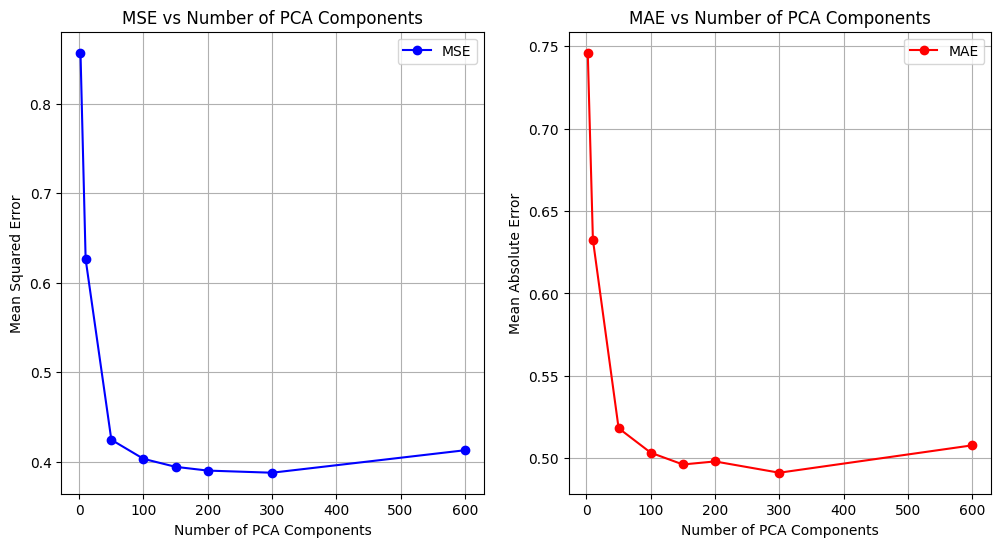

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assume df_us_filtered_na is your DataFrame
# Step 1: Separate features and label
features = df_us_filtered_na.loc[:, ~df_us_filtered_na.columns.str.startswith('PV')]  # All columns not starting with 'PV'
label = df_us_filtered_na['PV1MATH']  # Select 'PVMATH1' as the target label

scaler_label = StandardScaler()
label_normalized = scaler_label.fit_transform(label.values.reshape(-1, 1)).flatten()
# Define different numbers of components for PCA
components_list = [2, 10, 50, 100, 150, 200, 300, 600]
mse_scores = []
mae_scores = []

for n_components in components_list:
    # Apply PCA with n components
    pca = PCA(n_components=n_components)
    features_pca = pca.fit_transform(features)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features_pca, label_normalized, test_size=0.2, random_state=42)
    
    # Train a linear regression model using OLS
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    mse_scores.append(mse)
    mae_scores.append(mae)

# Plot MSE and MAE against the number of PCA components
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(components_list, mse_scores, marker='o', color='b', label='MSE')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Number of PCA Components')
plt.grid(True)
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(components_list, mae_scores, marker='o', color='r', label='MAE')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Absolute Error')
plt.title('MAE vs Number of PCA Components')
plt.grid(True)
plt.legend()


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Assume df_us_filtered_na is your DataFrame
# Step 1: Separate features and label
features = df_us_filtered_na.loc[:, ~df_us_filtered_na.columns.str.startswith('PV')]  # All columns not starting with 'PV'
label = df_us_filtered_na['PV1MATH']  # Select 'PVMATH1' as the target label

scaler_label = StandardScaler()
label_normalized = scaler_label.fit_transform(label.values.reshape(-1, 1)).flatten()

# Apply PCA for dimensionality reduction
pca = PCA(n_components=300)  # Reduce to 2 principal components
features_pca = pca.fit_transform(features)

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_pca, label_normalized, test_size=0.2, random_state=42)

# Step 3: Train a linear regression model using OLS
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate
y_pred = model.predict(X_test)

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Report results
print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")


Test MSE: 0.39066240756689175
Test MAE: 0.4928931782516739


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Split data into train and test sets without PCA
X_train, X_test, y_train, y_test = train_test_split(features, label_normalized, test_size=0.2, random_state=42)

# Train Decision Tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

# Train Random Forest model
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate models
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print(f"Decision Tree - Test MSE: {mse_tree:.4f}, Test MAE: {mae_tree:.4f}")

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - Test MSE: {mse_rf:.4f}, Test MAE: {mae_rf:.4f}")


Decision Tree - Test MSE: 0.9881, Test MAE: 0.7764
Random Forest - Test MSE: 0.4577, Test MAE: 0.5380


In [41]:
# Train Random Forest model
rf_reg = RandomForestRegressor(random_state=42, n_estimators=50, max_depth=20)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - Test MSE: {mse_rf:.4f}, Test MAE: {mae_rf:.4f}")

rf_reg = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=20)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - Test MSE: {mse_rf:.4f}, Test MAE: {mae_rf:.4f}")

rf_reg = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=20)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - Test MSE: {mse_rf:.4f}, Test MAE: {mae_rf:.4f}")


Random Forest - Test MSE: 0.4641, Test MAE: 0.5432
Random Forest - Test MSE: 0.4569, Test MAE: 0.5391
Random Forest - Test MSE: 0.4543, Test MAE: 0.5347


In [39]:
# Train Random Forest model
rf_reg = RandomForestRegressor(random_state=42, n_estimators=50, max_depth=5)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - Test MSE: {mse_rf:.4f}, Test MAE: {mae_rf:.4f}")

# Train Random Forest model
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - Test MSE: {mse_rf:.4f}, Test MAE: {mae_rf:.4f}")

# Train Random Forest model
rf_reg = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=5)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - Test MSE: {mse_rf:.4f}, Test MAE: {mae_rf:.4f}")


Random Forest - Test MSE: 0.5213, Test MAE: 0.5797
Random Forest - Test MSE: 0.5202, Test MAE: 0.5795
Random Forest - Test MSE: 0.5202, Test MAE: 0.5782


In [40]:
# Train Random Forest model
rf_reg = RandomForestRegressor(random_state=42, n_estimators=50, max_depth=10)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - Test MSE: {mse_rf:.4f}, Test MAE: {mae_rf:.4f}")

rf_reg = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - Test MSE: {mse_rf:.4f}, Test MAE: {mae_rf:.4f}")

rf_reg = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - Test MSE: {mse_rf:.4f}, Test MAE: {mae_rf:.4f}")

Random Forest - Test MSE: 0.4549, Test MAE: 0.5393
Random Forest - Test MSE: 0.4526, Test MAE: 0.5379
Random Forest - Test MSE: 0.4505, Test MAE: 0.5351


In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Initialize models
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train K-NN Regressor
knn_regressor.fit(X_train, y_train)
y_pred_knn = knn_regressor.predict(X_test)

# Evaluate K-NN Regressor
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"K-NN Regressor - Test MSE: {mse_knn:.4f}, Test MAE: {mae_knn:.4f}")

# Initialize models
knn_regressor = KNeighborsRegressor(n_neighbors=10)

# Train K-NN Regressor
knn_regressor.fit(X_train, y_train)
y_pred_knn = knn_regressor.predict(X_test)

# Evaluate K-NN Regressor
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"K-NN Regressor - Test MSE: {mse_knn:.4f}, Test MAE: {mae_knn:.4f}")

# Initialize models
knn_regressor = KNeighborsRegressor(n_neighbors=20)

# Train K-NN Regressor
knn_regressor.fit(X_train, y_train)
y_pred_knn = knn_regressor.predict(X_test)

# Evaluate K-NN Regressor
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"K-NN Regressor - Test MSE: {mse_knn:.4f}, Test MAE: {mae_knn:.4f}")

# Initialize models
knn_regressor = KNeighborsRegressor(n_neighbors=100)

# Train K-NN Regressor
knn_regressor.fit(X_train, y_train)
y_pred_knn = knn_regressor.predict(X_test)

# Evaluate K-NN Regressor
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"K-NN Regressor - Test MSE: {mse_knn:.4f}, Test MAE: {mae_knn:.4f}")

K-NN Regressor - Test MSE: 0.7890, Test MAE: 0.7036
K-NN Regressor - Test MSE: 0.7339, Test MAE: 0.6891
K-NN Regressor - Test MSE: 0.7094, Test MAE: 0.6834
K-NN Regressor - Test MSE: 0.7295, Test MAE: 0.6961


In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Initialize models
gbr_regressor = GradientBoostingRegressor(random_state=42, n_estimators=50)

# Train Gradient Boosting Regressor
gbr_regressor.fit(X_train, y_train)
y_pred_gbr = gbr_regressor.predict(X_test)

# Evaluate Gradient Boosting Regressor
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print(f"Gradient Boosting Regressor - Test MSE: {mse_gbr:.4f}, Test MAE: {mae_gbr:.4f}")

# Initialize models
gbr_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100)

# Train Gradient Boosting Regressor
gbr_regressor.fit(X_train, y_train)
y_pred_gbr = gbr_regressor.predict(X_test)

# Evaluate Gradient Boosting Regressor
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print(f"Gradient Boosting Regressor - Test MSE: {mse_gbr:.4f}, Test MAE: {mae_gbr:.4f}")

# Initialize models
gbr_regressor = GradientBoostingRegressor(random_state=42, n_estimators=200)

# Train Gradient Boosting Regressor
gbr_regressor.fit(X_train, y_train)
y_pred_gbr = gbr_regressor.predict(X_test)

# Evaluate Gradient Boosting Regressor
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print(f"Gradient Boosting Regressor - Test MSE: {mse_gbr:.4f}, Test MAE: {mae_gbr:.4f}")

# Initialize models
gbr_regressor = GradientBoostingRegressor(random_state=42, n_estimators=500)

# Train Gradient Boosting Regressor
gbr_regressor.fit(X_train, y_train)
y_pred_gbr = gbr_regressor.predict(X_test)

# Evaluate Gradient Boosting Regressor
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print(f"Gradient Boosting Regressor - Test MSE: {mse_gbr:.4f}, Test MAE: {mae_gbr:.4f}")

Gradient Boosting Regressor - Test MSE: 0.4231, Test MAE: 0.5224
Gradient Boosting Regressor - Test MSE: 0.3857, Test MAE: 0.4971
Gradient Boosting Regressor - Test MSE: 0.3668, Test MAE: 0.4807
Gradient Boosting Regressor - Test MSE: 0.3605, Test MAE: 0.4755


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assume df_us_filtered_na is your DataFrame
# Step 1: Separate features and label
features = df_us_filtered_na.loc[:, ~df_us_filtered_na.columns.str.startswith('PV')]  # All columns not starting with 'PV'
label = df_us_filtered_na['PV1MATH']  # Select 'PVMATH1' as the target label

scaler_label = StandardScaler()
label_normalized = scaler_label.fit_transform(label.values.reshape(-1, 1)).flatten()
# Define different numbers of components for PCA

pca = PCA(n_components=100)
features_pca = pca.fit_transform(features)
mse_scores = []
mae_scores = []

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_pca, label_normalized, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - Test MSE: {mse_rf:.4f}, Test MAE: {mae_rf:.4f}")


model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate
y_pred = model.predict(X_test)

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Report results
print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")

# Initialize models
gbr_regressor = GradientBoostingRegressor(random_state=42, n_estimators=200)

# Train Gradient Boosting Regressor
gbr_regressor.fit(X_train, y_train)
y_pred_gbr = gbr_regressor.predict(X_test)

# Evaluate Gradient Boosting Regressor
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print(f"Gradient Boosting Regressor - Test MSE: {mse_gbr:.4f}, Test MAE: {mae_gbr:.4f}")

Random Forest - Test MSE: 0.5708, Test MAE: 0.5973
Test MSE: 0.40604725944646636
Test MAE: 0.5017143807844473
Gradient Boosting Regressor - Test MSE: 0.4606, Test MAE: 0.5334


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assume df_us_filtered_na is your DataFrame
# Step 1: Separate features and label
features = df_us_filtered_na.loc[:, ~df_us_filtered_na.columns.str.startswith('PV')]  # All columns not starting with 'PV'
label = df_us_filtered_na['PV1MATH']  # Select 'PVMATH1' as the target label

scaler_label = StandardScaler()
label_normalized = scaler_label.fit_transform(label.values.reshape(-1, 1)).flatten()
# Define different numbers of components for PCA

pca = PCA(n_components=300)
features_pca = pca.fit_transform(features)
mse_scores = []
mae_scores = []

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_pca, label_normalized, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - Test MSE: {mse_rf:.4f}, Test MAE: {mae_rf:.4f}")


model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate
y_pred = model.predict(X_test)

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Report results
print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")

# Initialize models
gbr_regressor = GradientBoostingRegressor(random_state=42, n_estimators=200)

# Train Gradient Boosting Regressor
gbr_regressor.fit(X_train, y_train)
y_pred_gbr = gbr_regressor.predict(X_test)

# Evaluate Gradient Boosting Regressor
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print(f"Gradient Boosting Regressor - Test MSE: {mse_gbr:.4f}, Test MAE: {mae_gbr:.4f}")

Random Forest - Test MSE: 0.5930, Test MAE: 0.6095
Test MSE: 0.38510139619607914
Test MAE: 0.49022277036805095
Gradient Boosting Regressor - Test MSE: 0.4709, Test MAE: 0.5380
